# Part 1: Fundamentals of data visualization

Excercise: Questions for the lecture. 
* As mentioned earlier, visualization is not the only way to test for correlation. We can (for example) calculate the Pearson correlation. Explain in your own words how the Pearson correlation works and write down it's mathematical formulation. Can you think of an example where it fails (and visualization works)?
 * Pearson correlation measures linear correlation between two continuous variables. A pearson correlation of 1 is a perfect positive linear correlation, if 0 its no correlation, if -1 it is perfect negative linear correlation. It is essentially the ratio between covariance of two variables and the product of their standart deviations. Can be viewed as a normalized covariance.
$$
p(X,Y) = \frac{cov(X,Y)}{\sigma{}_X \sigma{}_Y}
$$
Pearsons correlation cannot detect dependency/correlation that is not linear. Therefore it is not enough to check correlation without plotting, you might miss another type of correlation in the data.

* What is the difference between a bar-chart and a histogram?
 * A bar-chart is a categorical chart. A histogram can be continuous (and can sum categories) and show patterns.

* I mention in the video that it's important to choose the right bin-size in histograms. But how do you do that? Do a Google search to find a criterion you like and explain it.
 * One criteria i like is Freedman-Diaconis rule. This calculate the bin size like this:
$$
bin size = 2 * \frac{IQR}{\sqrt[3]{n}}
$$
Where IQR is the interquartile range of the data which is the spread of the middle 50% of the data. It also takes the total number of data points n into consideration. 
 
 
 

# Part 2: Reading about the theory of visualization


Excercise: Questions for DAOST As always, try to answer without the help of your LLM and through reading the text, but feel free to add more nuance by asking it questions.


* Explain in your own words the point of the jitter plot.
    * If you want to make a scatterplot but multible observations have the same value, this will result in some observations disappering, and it is not possible to get a good overview of the actual distribution. Therefore you can add a bit of randomized noise, to visualise all existing dots. This will make the observations with same values visual.
* Explain in your own words the point of figure 2-3. (I'm going to skip saying "in your own words" going forward, but I hope you get the point; I expect all answers to be in your own words).
    * It is not just the bin size that can change the look of a histogram, but also the bin placement. Does the bin start in 0 or is it centered around 0? This can change the look of the distribution plotted.
* The author of DAOST (Philipp Janert) likes KDEs (and think they're better than histograms). And we don't. Sune didn't give a detailed explanation in the video, but now that works to our advantage. We'll ask you to think about this and thereby create an excellent exercise: When can KDEs be misleading?
    * If the data contains not a lot of observations the KDE might make mislead the viewer to think that there is deffinately a clear distribution when there is not.
* Sune discussed some strengths of the CDF - there are also weaknesses. Janert writes "CDFs have less intuitive appeal than histograms of KDEs". What does he mean by that?
    * He discusses that our eyes are quick at judging the peak of KDE, but not as good with judging the area under the curve. It is easier to view the distribution of KDE and histogram, because we have difficulty understanding the area under the CDF curve initially.
* What is a Quantile plot? What is it good for.
    * A quantile plot is a CDF with the x and y axis interchanged (?)
* How is a Probablity plot defined? What is it useful for? Have you ever seen one before?
    * You can use it to see if data is Gaussian distributed, and the mean and std estimates can be read off the graph.
* One of the reasons we like DAOST is that Janert is so suspicious of mean, median, and related summary statistics. Explain why one has to be careful when using those - and why visualization of the full data is always better.
    * Visualization of data reveals a lot more about a dataset, and it provides more insight on the distribution. Mean and median can sometimes be misleading or a simplification. This can be dues to outliers, or non-normal distributed data, and there is no information of variance..
* Sune loves box plots (but not enough to own one of these 😂). When are box plots most useful?
    * Comparing two distributions visually
* The book doesn't mention violin plots. Are those better or worse than box plots? Why?
    * They provide the same information as a box plot more or less, but also a Kernel Density Plot. BUT they can be harder to interpret, and do not provide the summary statistics that the box plot does.
* Remember the box-plot part from this video from last time (the part that starts at 0:56)? Explain in your own words how this video illustrates potential issues even with box-plots? Do violin-plots help with that issue?
    * You cant really tell what distribution the data follows by a boxplot (fx if it is normal distributed or not). A violin plot does not nessesarily help with this, since it like KDE can over simplify or mislead in terms of distribution. This could be a problem with a uniform distribution.

# Part 3: Visualizations based on the book
Excercise Part 1: Connecting the dots and recreating plots from DAOST but using our own favorite dataset.

* Let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example). So let time run on the x-axis and create vertical jitter.

Below i load the data and filter it so i have time between 13-14 and the first six months of 2017:

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240204.csv") 

# Make the Time and Date column into panda time
data['Date'] = pd.to_datetime(data['Date'])
data[['Hour', 'Minute']] = data['Time'].str.split(':', expand=True).astype(int)

# Filter only the crimes in hour 13:
h13 = data[data['Hour'] == 13]
# Filter only on the first six months of the year
h13_2q = h13[(h13['Date'].dt.month >= 1) & (h13['Date'].dt.month <= 6)]
# And filter only 2017:
h13_2q_2017 = h13_1q[h13_2q['Date'].dt.year == 2017]

# Robbery filter:
ROB_h13_2q_2017 = h13_2q_2017[h13_2q_2017['Category'] == 'ROBBERY']


60


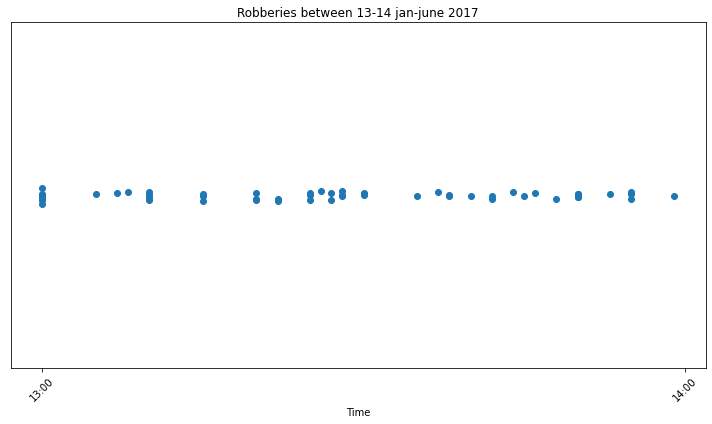

In [120]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Convert 'Time' column to datetime objects
data_filtered = ROB_h13_2q_2017.copy()  # Ensure to create a copy to avoid the SettingWithCopyWarning
data_filtered['Time'] = pd.to_datetime(data_filtered['Time'])

# Sort the DataFrame by the 'Time' column
data_filtered_sorted = data_filtered.sort_values(by='Time')

#y =  ROB_h13_1q_2017_sorted['Category']
y = np.zeros(len(ROB_h13_2q_2017))
jitter = 0.02  # Adjust as needed

# Add random noise to the y-values
y_jittered = y + np.random.normal(loc=0, scale=jitter, size=len(y))


# CHATGBT

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered_sorted['Time'],y_jittered)

# Formatting x-axis with proper time format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.ylim(-1, 1)
plt.yticks([])

# Add labels and title
plt.xlabel('Time')
plt.title('Robberies between 13-14 jan-june 2017')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()


* Last time, we did lots of bar-plots. Today, we'll play around with histograms (creating two crime-data based versions of the plot-type shown in DAOST Figure 2-2). I think the GPS data could be fun to see this way.
    * This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)
    * Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram. This function gives you the counts and then you do your own plotting.

In [143]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240204.csv") 

# Make the Time and Date column into panda time
data['Date'] = pd.to_datetime(data['Date'])

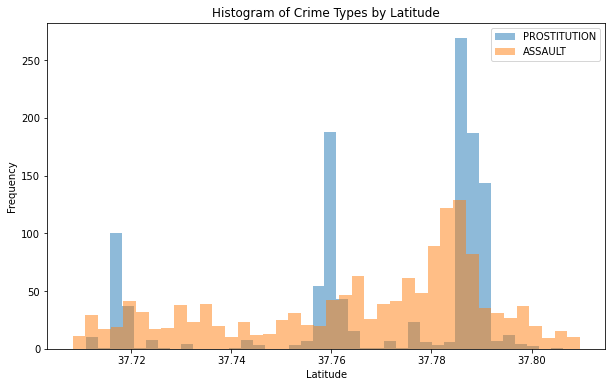

In [194]:
# Filter data for each crime type and time interval that results in approx. 1000 crimes
PROSTITUTION_data = data[(data["Category"] == "PROSTITUTION") & (data["Date"].between('2016-01-01', '2018-01-01'))]
ASSAULT_data = data[(data["Category"] == "ASSAULT") & (data["Date"].between('2016-01-01', '2016-02-15'))]

# Extract latitude data from the 'location' column
latitude_PROSTITUTION_data = PROSTITUTION_data['location'].str.extract(r'POINT \([^ ]+ ([^)]+)\)').astype(float)
latitude_ASSAULT_data = ASSAULT_data['location'].str.extract(r'POINT \([^ ]+ ([^)]+)\)').astype(float)


# Bin the latitudes
num_bins = 40
bins_1 = np.histogram(latitude_PROSTITUTION_data, bins=num_bins)[1]
bins_2 = np.histogram(latitude_ASSAULT_data, bins=num_bins)[1]

# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(latitude_PROSTITUTION_data, bins=bins_1, alpha=0.5, label="PROSTITUTION")
plt.hist(latitude_ASSAULT_data, bins=bins_2, alpha=0.5, label="ASSAULT")
plt.xlabel("Latitude")
plt.ylabel("Frequency")
plt.title("Histogram of Crime Types by Latitude")
plt.legend()
plt.show()

* Next up is using the plot-type shown in Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. There is not a single great way to create kernel density plots in Python. Here, you'll finde a pandas based strategy, but you can also use gaussian_kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot. There is also another nice tutorial for KDE plots here. Or ask your LLM what it recommends.



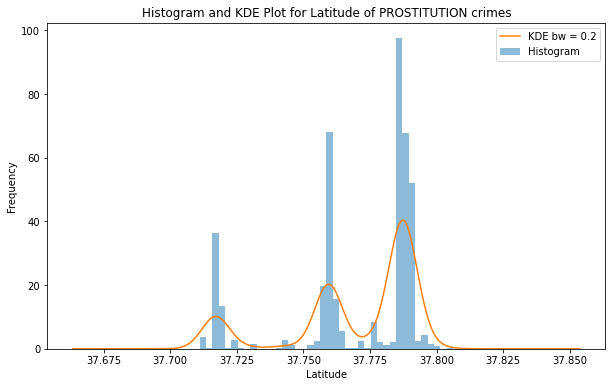

In [188]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(latitude_PROSTITUTION_data, bins=bins_1, alpha=0.5, density=True)

# Plot KDE Panda version:
bw = 0.2
latitude_PROSTITUTION_data.plot.kde(ax=ax,bw_method=bw)


# labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Frequency')
ax.set_title('Histogram and KDE Plot for Latitude of PROSTITUTION crimes')

# legend
ax.legend(["KDE bw = 0.2","Histogram"])
#ax.legend()

# Show plot
plt.show()


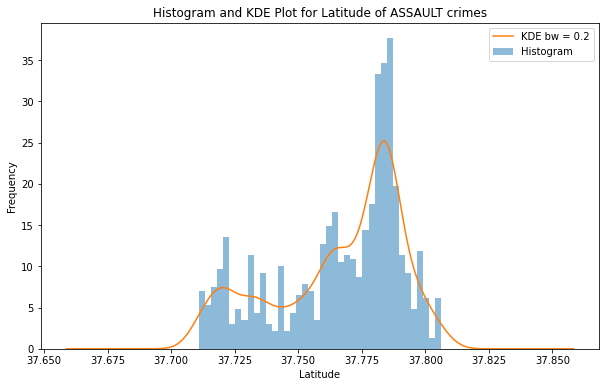

In [189]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(latitude_ASSAULT_data, bins=bins_1, alpha=0.5, density=True)

# Plot KDE Panda version:
bw = 0.2
latitude_ASSAULT_data.plot.kde(ax=ax,bw_method=bw)


# labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Frequency')
ax.set_title('Histogram and KDE Plot for Latitude of ASSAULT crimes')

# legend
ax.legend(["KDE bw = 0.2","Histogram"])
#ax.legend()

# Show plot
plt.show()


* Now grab 25 random timepoints from the dataset (of 1000-10000 original data) you've just plotted and create a version of Figure 2-4 based on the 25 data points. Does this shed light on why I think KDEs can be misleading?

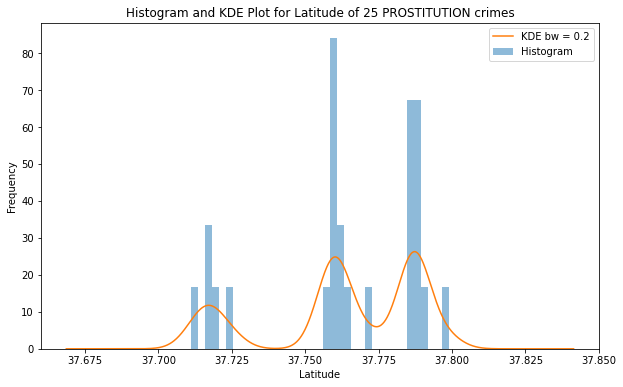

In [190]:
random_sample = latitude_PROSTITUTION_data.sample(n=25)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(random_sample, bins=bins_1, alpha=0.5, density=True)

# Plot KDE Panda version:
bw = 0.2
random_sample.plot.kde(ax=ax,bw_method=bw)


# labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Frequency')
ax.set_title('Histogram and KDE Plot for Latitude of 25 PROSTITUTION crimes')

# legend
ax.legend(["KDE bw = 0.2","Histogram"])
#ax.legend()

# Show plot
plt.show()

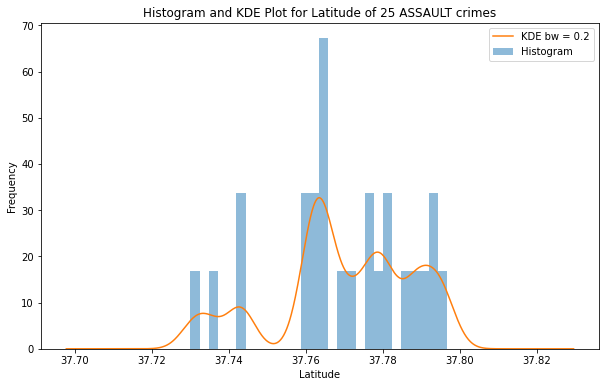

In [191]:
random_sample = latitude_ASSAULT_data.sample(n=25)

fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(random_sample, bins=bins_1, alpha=0.5, density=True)

# Plot KDE Panda version:
bw = 0.2
random_sample.plot.kde(ax=ax,bw_method=bw)


# labels and title
ax.set_xlabel('Latitude')
ax.set_ylabel('Frequency')
ax.set_title('Histogram and KDE Plot for Latitude of 25 ASSAULT crimes')

# legend
ax.legend(["KDE bw = 0.2","Histogram"])
#ax.legend()

# Show plot
plt.show()

Excercise Part 2:

* Now we'll work on creating two versions of the plot in Figure 2-11, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth.
    * Hint: Take a look at the scipy.stats.probplot function.

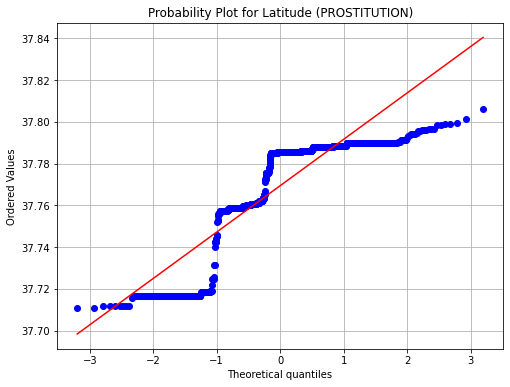

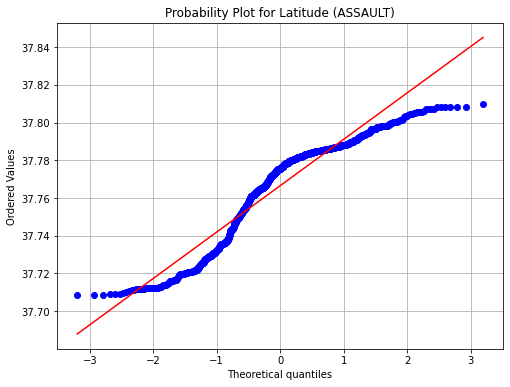

In [205]:
# CHATGBT
from scipy import stats

# Truncate latitude data for both crime types to match the desired size
latitude_PROSTITUTION_truncated = latitude_PROSTITUTION_data[:1000].values.flatten()
latitude_ASSAULT_truncated = latitude_ASSAULT_data[:1000].values.flatten()

# Create probability plot for PROSTITUTION
plt.figure(figsize=(8, 6))
stats.probplot(latitude_PROSTITUTION_truncated, dist="norm", plot=plt)
plt.title('Probability Plot for Latitude (PROSTITUTION)')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid()

# Show plot
plt.show()

# Create a new figure for the next probability plot
plt.figure(figsize=(8, 6))

# Create probability plot for ASSAULT
stats.probplot(latitude_ASSAULT_truncated, dist="norm", plot=plt)
plt.title('Probability Plot for Latitude (ASSAULT)')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid()

# Show plot
plt.show()


* OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. We'll use data from the 15 focus crimes defined last week.
    * For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data.
    * Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this. I like to use matplotlibs's built in functionality, but you can also achieve good results with seaborn or pandas. It's also fine to get help from your LLM, but make sure you check that the plot accurately shows the stats about the underlying data!.
    * What does this plot reveal that you can't see in the plots from last time?

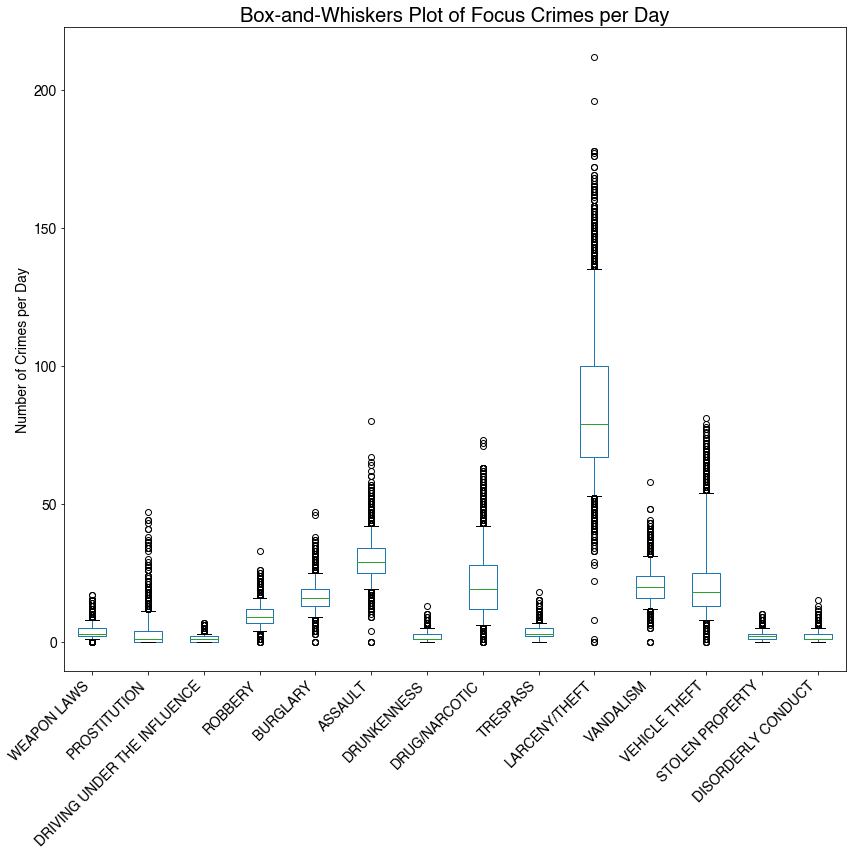

In [253]:
# CHATGBT help

# Group data by category and dates:
date_grouped = data.groupby(['Category', pd.Grouper(key='Date', freq='D')]) # 'D' is daily
# Calculate size of each grouping (i.e. number of occurences of a category and date), and transpose:
date_counts = date_grouped.size().unstack(fill_value=0).T

# Filter date_counts DataFrame for focus crimes and aggregate by day
focus_date_counts = date_counts[focuscrimes].groupby(pd.Grouper(freq='D')).sum()

# Plot
plt.figure(figsize=(12, 12))
focus_date_counts.boxplot(whis=[5, 95])
plt.ylabel('Number of Crimes per Day',fontsize=14, fontname='Helvetica')
plt.title('Box-and-Whiskers Plot of Focus Crimes per Day',fontsize=20, fontname='Helvetica')
plt.xticks(rotation=45, ha='right',fontsize=14, fontname='Helvetica')
plt.yticks(fontsize=14, fontname='Helvetica')

plt.grid(False)
plt.tight_layout()
plt.show()


This plot clearly shows what crimes happen most often compared to the other crimes. 

* Also I want to show you guys another interesting use of box plots. To get started, let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place. There are many ways to do this, but let me describe one way to do it.
    * For datapoint, the only thing you care about is the time-of-day, so discard everything else.
    * You also have to deal with the fact that time is annoyingly not divided into nice units that go to 100 like many other numbers. I can think of two ways to deal with this.
    * For each time-of-day, simply encode it as seconds since midnight.
    * Or keep each whole hour, and convert the minute/second count to a percentage of an hour. So 10:15 -> 10.25, 8:40 -> 8.67, etc.

In [294]:
# Extract Hour and Minutes from Time:
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour
data['Minute'] = data['Time'].dt.minute

# Convert Minutes to percentage of an hour:
data['Minute'] = 100*data['Minute']/60

# Filter on only focuscrimes:
focus_crime_data = data[data['Category'].isin(focuscrimes)].copy()


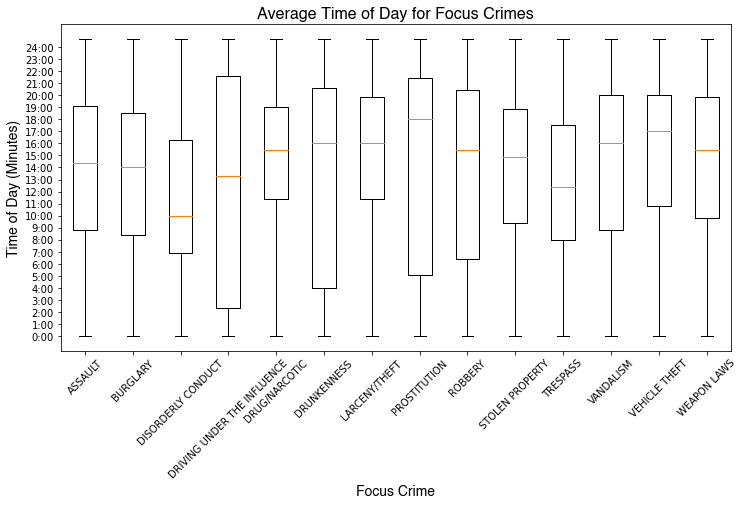

In [295]:
# CHATGBT

# Calculate the time of day in minutes
focus_crime_data['TimeOfDay'] = focus_crime_data['Hour'] * 60 + focus_crime_data['Minute']

# Group data by category and calculate the mean time of day
time_counts = focus_crime_data.groupby('Category')['TimeOfDay'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.boxplot([group['TimeOfDay'] for name, group in focus_crime_data.groupby('Category')])
plt.xlabel('Focus Crime', fontsize=14, fontname='Helvetica')
plt.ylabel('Time of Day (Minutes)', fontsize=14, fontname='Helvetica')
plt.title('Average Time of Day for Focus Crimes', fontsize=16, fontname='Helvetica')
plt.xticks(range(1, len(focuscrimes) + 1), time_counts['Category'], rotation=45)
plt.yticks(np.arange(0, 24*60+1, 60), [f'{int(t/60)}:{t%60:02d}' for t in np.arange(0, 24*60+1, 60)])
plt.grid(False)
plt.show()


# Part 4: Visualizing geodata with Plotly

* Exercise: Let's plot a map with some random values in it. For this one, it might be tempting to ask your LLM for a lot of help ... but don't let it do the work for you. Use it as a helper - not an end-to-end solution. There are many new concepts to understand, and doing the exercise yourself is the best way to begin to get the nitty-gritty details of maps and shapfiles under your skin.
* What we need to do to get going is some random data. Below is a little dictionary with a random value for each district.


In [10]:
randomdata = {
    'CENTRAL': 0.283805288999638,
    'SOUTHERN': 0.8882636532075772,
    'BAYVIEW': 0.45059924801053985,
    'MISSION': 0.6000904430914474,
    'PARK': 0.6362552416309091,
    'RICHMOND': 0.3371857964893169,
    'INGLESIDE': 0.09876749056377487,
    'TARAVAL': 0.009436215026031758,
    'NORTHERN': 0.44884916837512767,
    'TENDERLOIN': 0.06616710190569974
}

Exercise (continued):

* For this exercise, we'll use use the random values above and we'll also need some shape-files. Shapefiles can have many different formats. Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as geojson, which is an easy-to-use format for shapefiles based on json

In [46]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    counties_geojson = json.load(response)

import pandas as pd

# Convert the randomdata dictionary to a DataFrame
random_df = pd.DataFrame.from_dict(randomdata, orient='index', columns=['Random Value'])

# Reset index to make 'DISTRICT' a column
random_df.reset_index(inplace=True)
random_df.rename(columns={'index': 'DISTRICT'}, inplace=True)

import plotly.express as px
fig = px.choropleth_mapbox(random_df, geojson=counties_geojson, locations='DISTRICT', color='Random Value',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.774, "lon": -122.431297},
                           opacity=0.5,
                           labels={'Random Value':'Random Value'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


     DISTRICT  Random Value
0     CENTRAL      0.283805
1    SOUTHERN      0.888264
2     BAYVIEW      0.450599
3     MISSION      0.600090
4        PARK      0.636255
5    RICHMOND      0.337186
6   INGLESIDE      0.098767
7     TARAVAL      0.009436
8    NORTHERN      0.448849
9  TENDERLOIN      0.066167


Exercise: But it's crime-data. Let's do something useful and visualize where it is safest to leave your car on a Sunday.
* Now, we can focus on our main goal: determine the districts where you should (and should not) leave your car on Sundays. (Or stated differently, count up the number of thefts.)

To do so, first:
* Filter the crime dataset by the DayOfWeek category and also choose the appropriate crime category.
* Aggregate data by police district.
* To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.

In [56]:
data = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018_20240204.csv") 

Sunday_data = data[data['DayOfWeek'] == 'Sunday']
Sunday_VEHICLE_THEFT_data = Sunday_data[Sunday_data['Category'] == 'VEHICLE THEFT']

data_grouped = Sunday_VEHICLE_THEFT_data.groupby('PdDistrict').size().reset_index()
data_grouped.columns = ['DISTRICT', 'THEFT_COUNT']

In [58]:
fig = px.choropleth_mapbox(data_grouped, geojson=counties_geojson, locations='DISTRICT', color='THEFT_COUNT',
                           color_continuous_scale="Viridis",
                           range_color=(0, max(data_grouped['THEFT_COUNT'])),
                           mapbox_style="carto-positron",
                           zoom=11, center = {"lat": 37.774, "lon": -122.431297},
                           opacity=0.5,
                           labels={'Random Value':'Random Value'}
                          )

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

* Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?
    * I should park my car in Tenderloin where there is the fewest vehicle thefts on sundays. The worst place is Ingleside.

* Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident?
* Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this article to get some inspiration.
    * One problem with this plot is that the areas are of different sizes, thereby the smallest area naturally have the fewest car thefts...